In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import sklearn
%matplotlib inline
from word2number import w2n

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

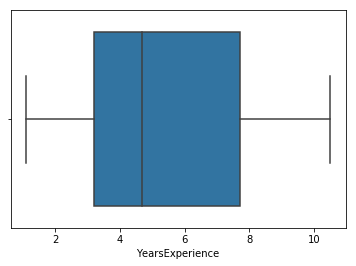

In [5]:
sns.boxplot(df['YearsExperience'])

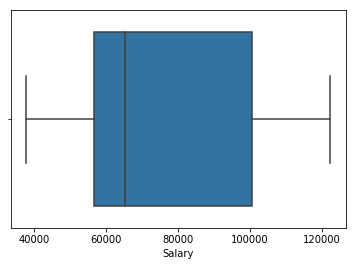

In [6]:
sns.boxplot(df['Salary'])

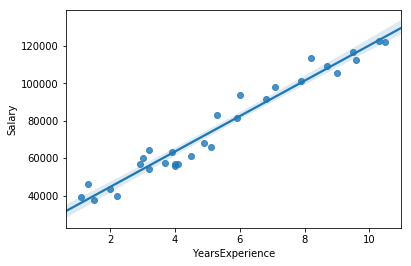

In [7]:
sns.regplot(x='YearsExperience',y='Salary',data=df,fit_reg=True)

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
x= df[['YearsExperience']] # Independent Variable
y= df[['Salary']] # Dependent Variable

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state = 8)
# random_state is basically i will assign in which mera data cannot chnge when i run these command again again nd put any value its depand on me

In [12]:
x_train

,YearsExperience
6,3.0
23,8.2
11,4.0
2,1.5
14,4.5
21,7.1
26,9.5
28,10.3
12,4.0
10,3.9


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression() # created an instance(name defined ) of 'LinearRegression' class

In [15]:
model.fit(x_train,y_train) # another way say that to create a best fit line 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

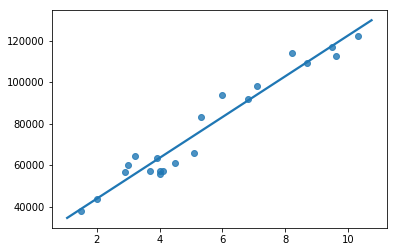

In [16]:
sns.regplot(x_train,y_train)

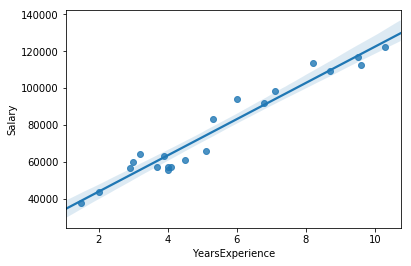

In [17]:
sns.regplot(x_train['YearsExperience'],y_train['Salary'])

In [18]:
model.intercept_

array([24142.94047619])

In [19]:
model.coef_

array([[9833.75]])

In [20]:
# prediction model
# y = 24167.2837 + 9824.99*x

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred

array([[112646.69047619],
       [ 34960.06547619],
       [ 55610.94047619],
       [ 82162.06547619],
       [ 72328.31547619],
       [ 45777.19047619],
       [127397.31547619],
       [ 36926.81547619],
       [101829.56547619]])

In [23]:
x_test

,YearsExperience
25,9.0
0,1.1
7,3.2
18,5.9
15,4.9
4,2.2
29,10.5
1,1.3
22,7.9


In [24]:
24167.2837 + 9824.99*9

112592.1937

# Error or residual

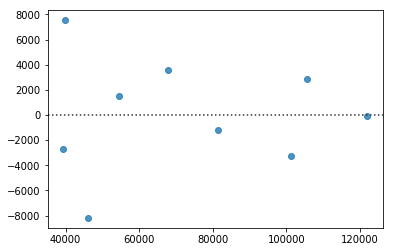

In [25]:
sns.residplot(y_test, y_pred)
# jitna zero line k pass hoga utna kam error hoga nd utna accha model bna hai

In [26]:
y_test

,Salary
25,105582
0,39343
7,54445
18,81363
15,67938
4,39891
29,121872
1,46205
22,101302


In [27]:
112646.69047619-105582 #to check first point on graph 

7064.690476189993

In [28]:
df_error = pd.DataFrame(y_pred-y_test)
df_error.sort_index(inplace=True)
df_error

,Salary
0,-4382.934524
1,-9278.184524
4,5886.190476
7,1165.940476
15,4390.315476
18,799.065476
22,527.565476
25,7064.690476
29,5525.315476


In [29]:
from sklearn import metrics

In [30]:
r_sq = metrics.r2_score(y_test,y_pred)

In [31]:
print(r_sq)

0.9683243145622814


In [32]:
mse =metrics.mean_squared_error(y_test,y_pred) # sq of df_error nd mean find they show me mse

In [33]:
print(mse)

26881349.13300735


In [34]:
from math import sqrt
rmse=sqrt(mse)
print(rmse)

5184.722666932857


In [35]:
np.sqrt(mse)

5184.722666932857